# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)

        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nogliki
Processing Record 2 of Set 1 | amahai
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | naze
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | egilsstadir
Processing Record 12 of Set 1 | uturoa
Processing Record 13 of Set 1 | kayangel
Processing Record 14 of Set 1 | chokwe
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | saudarkrokur
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | haiku-pauwela
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | chonchi
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nogliki,51.8333,143.1667,280.01,93,100,2.68,RU,1718390308
1,amahai,-3.3333,128.9167,297.94,89,100,1.59,ID,1718390308
2,georgetown,5.4112,100.3354,304.12,72,20,3.09,MY,1718390181
3,ancud,-41.8697,-73.8203,282.11,74,100,1.43,CL,1718390308
4,blackmans bay,-43.0167,147.3167,279.22,94,100,3.50,AU,1718390308


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nogliki,51.8333,143.1667,280.01,93,100,2.68,RU,1718390308
1,amahai,-3.3333,128.9167,297.94,89,100,1.59,ID,1718390308
2,georgetown,5.4112,100.3354,304.12,72,20,3.09,MY,1718390181
3,ancud,-41.8697,-73.8203,282.11,74,100,1.43,CL,1718390308
4,blackmans bay,-43.0167,147.3167,279.22,94,100,3.50,AU,1718390308


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

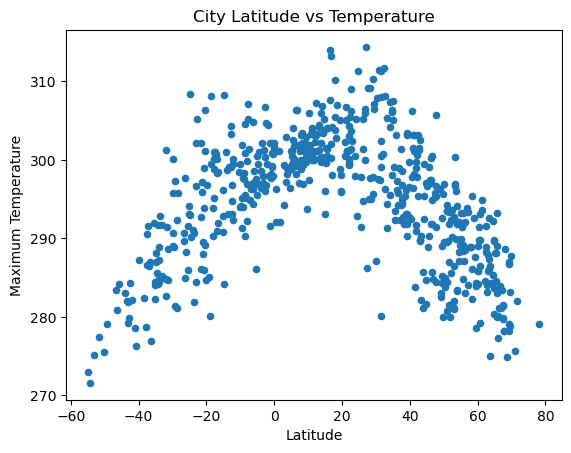

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Max Temp")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("City Latitude vs Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

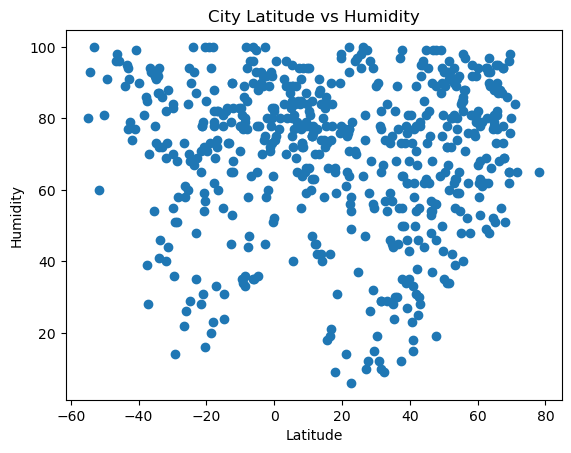

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

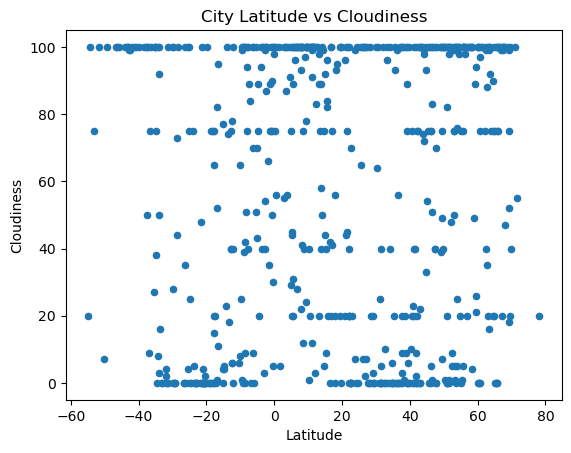

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Cloudiness")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.title("City Latitude vs Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

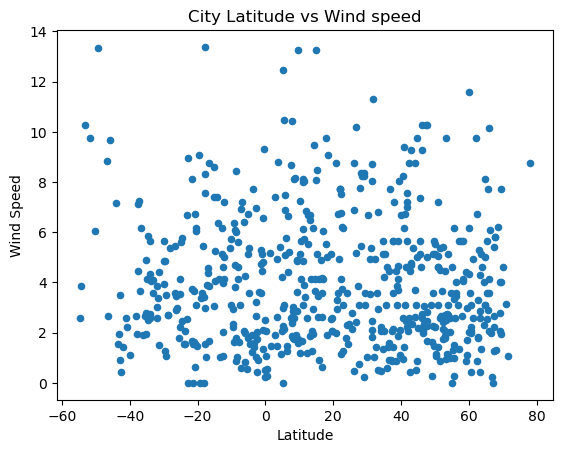

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Wind Speed")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.title("City Latitude vs Wind speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values,y_values,title):
    
    # Run regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    #Plot regression with scatter plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")

    print(f"The r-squared is: {rvalue}")
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nogliki,51.8333,143.1667,280.01,93,100,2.68,RU,1718390308
2,georgetown,5.4112,100.3354,304.12,72,20,3.09,MY,1718390181
6,naze,28.3667,129.4833,297.66,96,100,8.36,JP,1718390308
8,isafjordur,66.0755,-23.1240,280.17,87,75,4.12,IS,1718390308
10,egilsstadir,65.2653,-14.3948,288.10,51,0,5.66,IS,1718390308


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,amahai,-3.3333,128.9167,297.94,89,100,1.59,ID,1718390308
3,ancud,-41.8697,-73.8203,282.11,74,100,1.43,CL,1718390308
4,blackmans bay,-43.0167,147.3167,279.22,94,100,3.50,AU,1718390308
5,puerto natales,-51.7236,-72.4875,277.40,60,100,9.77,CL,1718390308
7,adamstown,-25.0660,-130.1015,293.07,70,100,3.53,PN,1718390308


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7266670183348699


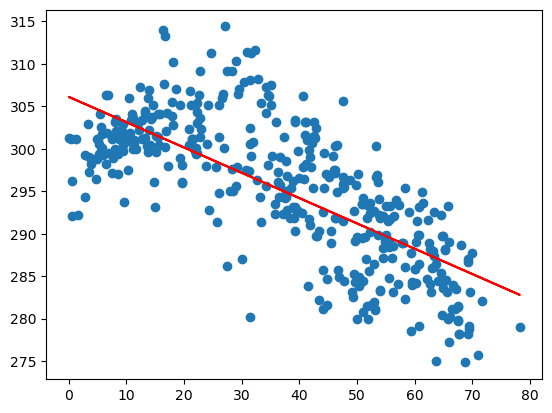

In [56]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp')


The r-squared is: 0.7537867777955273


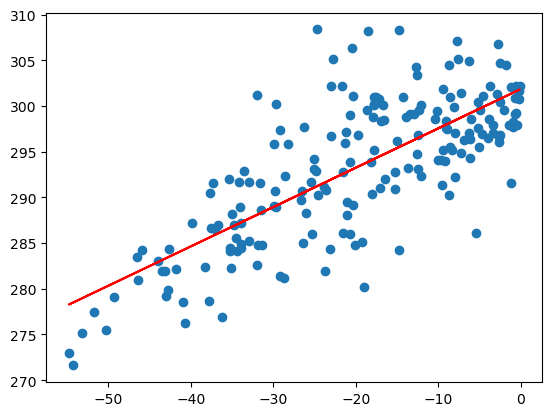

In [58]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp')


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Southern hemisphere latitude has higher effects on tempreture than northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03065635680645361


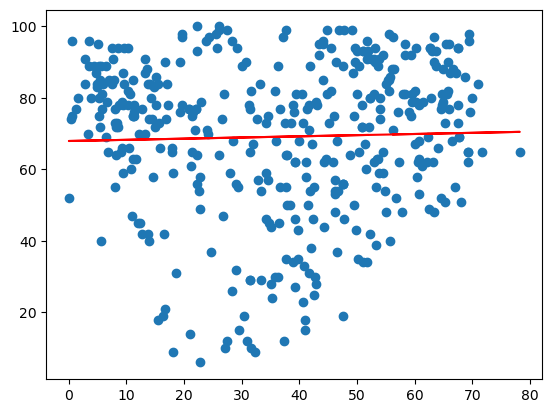

In [50]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity')



The r-squared is: -0.06600411510614533


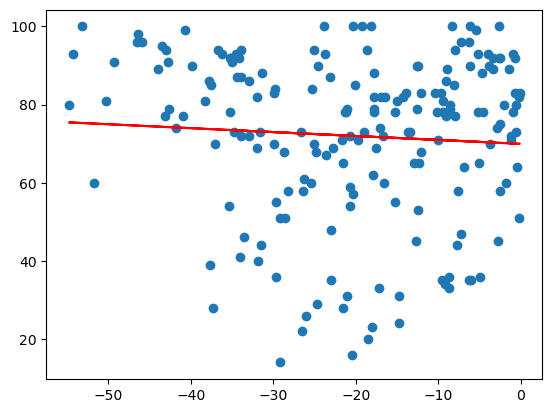

In [51]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity')


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Both southern and northern hemisphere has low effects on humidity with its latitude value. This could be determined due to low r squared value. values below 0.3 indicate weak data link.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.021088548062533276


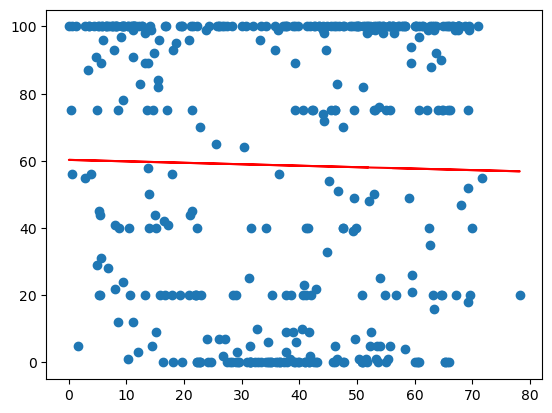

In [52]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness')


The r-squared is: -0.036266263363632235


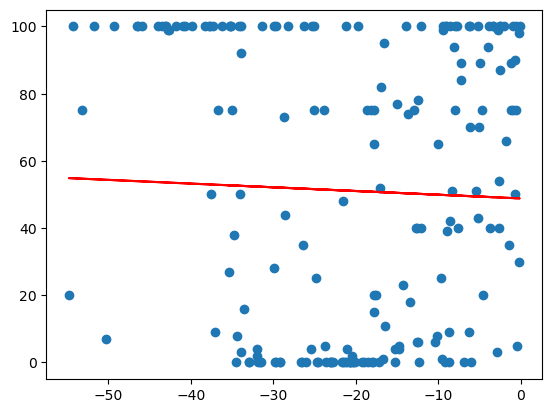

In [53]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness')


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Both southern and northern hemisphere has low effects on cloudiness with its latitude value. This could be determined due to low r squared value. values below 0.3 indicate weak data link.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.12266483592167308


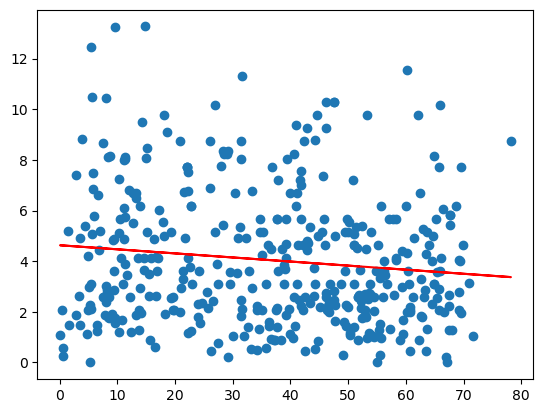

In [54]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed')


The r-squared is: -0.10730611825428017


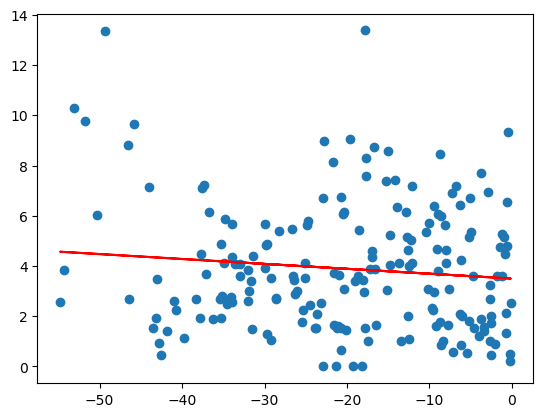

In [55]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed')


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Both southern and northern hemisphere has low effects on wind speed with its latitude value. This could be determined due to low r squared value. values below 0.3 indicate weak data link.